In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scikitplot as skplt

In [2]:
#import data and add header row
toxic = pd.read_csv("toxic/train.csv")
toxic.head(n=10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
toxic['comment_text'].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [4]:
#lowercase text and removing punctuation in title to have smaller size of model in future
import string

def normalize(s):
    s = s.lower()
    s = s.translate(str.maketrans('','', string.punctuation))
    s = s.replace('\n', ' ')
    return s

toxic['comment_text'] = [normalize(s) for s in toxic['comment_text']]
    

In [5]:
toxic['comment_text'].head()

0    explanation why the edits made under my userna...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3     more i cant make any real suggestions on impr...
4    you sir are my hero any chance you remember wh...
Name: comment_text, dtype: object

In [6]:
X = toxic["comment_text"].values 
y = toxic[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values

In [7]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [8]:
#toxic['target'] = pd.Series([(toxic['toxic'], toxic['severe_toxic'])], index=toxic.index)

In [9]:
# toxic['target'] = list(zip(toxic['toxic'],
#                            toxic['severe_toxic'],
#                            toxic['obscene'],
#                            toxic['threat'],
#                            toxic['insult'],
#                            toxic['identity_hate']))

In [10]:
toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


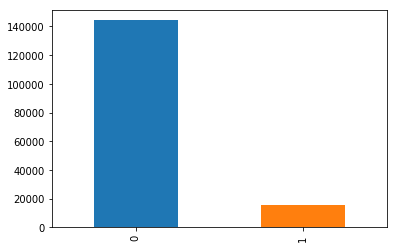

In [11]:
toxic['toxic'].value_counts().plot(kind='bar')

In [12]:
#normalize=True for %
toxic['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(X_test.shape)

(119678,)
(39893,)


In [14]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

X = toxic['comment_text']
y = toxic['toxic']

seed = 42

#names = ["Naive Bayes", "Linear SVM", "Logistic Regression", "Random Forest"]
names =["Logistic Regression"]

# classifiers = [
#     MultinomialNB(),
#     LinearSVC(),
#     LogisticRegression(),
#     RandomForestClassifier()
# ]
classifiers = [
    LogisticRegression()
]


# parameters = [{'vect__ngram_range': [(1, 1), (1, 2)],
#               'clf__alpha': (1e-2, 1e-3)},
#               {'vect__ngram_range': [(1, 1), (1, 2)],
#               'clf__C': (np.logspace(0, 1, 10))},
#               {'vect__ngram_range': [(1, 1), (1, 2)],
#               'clf__C': (np.logspace(0, 1, 5))},
#               {'vect__ngram_range': [(1, 1), (1, 2)],
#               'clf__max_depth': (1, 2)}           
#              ]
parameters = [
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(0, 1, 5))}  
             ]


results = []

for name, classifier, params in zip(names, classifiers, parameters):
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('clf', classifier),
    ])
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    cv_results = model_selection.cross_val_score(gs_clf, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    out = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(out)


Logistic Regression: 0.959291 (0.000479)


In [20]:
import numpy as np


In [24]:
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfTransformer
stemmer = SnowballStemmer("english", ignore_stopwords=True)
class StemmedCountVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vec = StemmedCountVectorizer(stop_words='english')


In [25]:
from sklearn.preprocessing import MultiLabelBinarizer
y = MultiLabelBinarizer().fit_transform(y)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection


kfold = model_selection.KFold(n_splits=5, random_state=42)

text_clf = Pipeline([
#         ('vect', TfidfVectorizer(stop_words='english')),
        ('vect', stemmed_count_vec),
        ('tfidf', TfidfTransformer()),
        ('clf', RandomForestClassifier()),
    ])
cv_results = model_selection.cross_val_score(text_clf, X, y, cv=kfold, scoring='accuracy', n_jobs=-1)
cv_results